In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [3]:
train = pd.read_csv(r'C:\Users\Abhi\OneDrive\Desktop\NTA\Dataset\Train.csv')

In [4]:
test = pd.read_csv(r'C:\Users\Abhi\OneDrive\Desktop\NTA\Dataset\Test.csv')

In [5]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [7]:
train.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [9]:
train.shape

(25192, 42)

In [10]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [12]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='class', ylabel='count'>

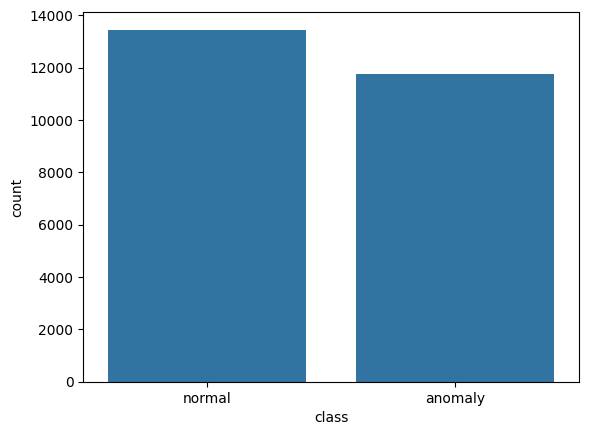

In [12]:
sns.countplot(x=train['class'])

In [13]:
print('class distribution training set:')
print(train['class'].value_counts())

class distribution training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [14]:
def le(df):
    for col in df.columns:
        if df[col].dtype== 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [15]:
train.head

<bound method NDFrame.head of        duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              1       19     9        491          0     0   
1             0              2       41     9        146          0     0   
2             0              1       46     5          0          0     0   
3             0              1       22     9        232       8153     0   
4             0              1       22     9        199        420     0   
...         ...            ...      ...   ...        ...        ...   ...   
25187         0              1       16     2          0          0     0   
25188         0              1       19     9        334          0     0   
25189         0              1       46     1          0          0     0   
25190         0              1       38     5          0          0     0   
25191         0              1       17     5          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_

In [16]:
X = train.drop(['class'],axis=1)
Y = train['class']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.70, random_state=2)

In [18]:
scale = StandardScaler()
X_train = scale.fit_transform(x_train)
X_test = scale.fit_transform(x_test)

In [19]:
x_train.shape

(17634, 41)

In [20]:
x_test.shape

(7558, 41)

In [21]:
y_train.shape

(17634,)

In [22]:
y_test.shape

(7558,)

In [23]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

c:\Users\Abhi\OneDrive\Desktop\NTA\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create a new Random Forest classifier and train it with the top 25 features
classifier = RandomForestClassifier(n_estimators=20 , criterion="entropy", random_state= 0, max_depth= 20)
classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=20,
                       random_state=0)

In [26]:

feature_importances = classifier.feature_importances_

# Combine feature names with their importances
feature_importance_dict = dict(zip(x_train.columns, feature_importances))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")




Feature Importances:
src_bytes: 0.1259830422893968
same_srv_rate: 0.10550733238799496
dst_host_srv_count: 0.08299247961369297
logged_in: 0.07674576465599706
dst_bytes: 0.06565981006935014
flag: 0.05960476228525462
diff_srv_rate: 0.05777327497692006
dst_host_same_src_port_rate: 0.05222933068753109
dst_host_same_srv_rate: 0.041569052132767924
count: 0.037813116680719176
dst_host_serror_rate: 0.0356486786929251
service: 0.03168151687202001
protocol_type: 0.0310023399656779
srv_count: 0.028241839464162977
dst_host_srv_diff_host_rate: 0.026246453334419967
srv_serror_rate: 0.024286904734729806
hot: 0.01801971824288457
dst_host_count: 0.016765291200479097
dst_host_rerror_rate: 0.015862449487435818
dst_host_diff_srv_rate: 0.012660491997192679
srv_diff_host_rate: 0.009593041093306347
rerror_rate: 0.009380919240142678
num_compromised: 0.006545445176021923
dst_host_srv_rerror_rate: 0.00585819172954772
dst_host_srv_serror_rate: 0.00517225125394328
wrong_fragment: 0.004410267513765468
duration: 0.

In [27]:
top_20_features = [feature for feature, importance in sorted_features[:20]]

# Use only the top 25 features in your training and testing data
x_train_top20 = x_train[top_20_features]
x_test_top20= x_test[top_20_features]



In [28]:
classifier_top20 = RandomForestClassifier(n_estimators=18, criterion='log_loss', max_depth=20, min_samples_split= 8, min_samples_leaf= 2 )
classifier_top20.fit(x_train_top20, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=20, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=18)

In [29]:
y_pred_top20 = classifier_top20.predict(x_test_top20)
accuracy_top20 = accuracy_score(y_test, y_pred_top20)

print("Test Accuracy with Top 25 Features:", accuracy_top20)

Test Accuracy with Top 25 Features: 0.9948399047367028


In [30]:
rfc_train, rfc_test = classifier_top20.score(x_train_top20,y_train),classifier_top20.score(x_test_top20,y_test)

print(f"Train Score: {rfc_train}")
print(f"Test Score: {rfc_test}")

Train Score: 0.9984688669615516
Test Score: 0.9948399047367028


In [31]:
cfm = confusion_matrix(y_test, y_pred_top20)
print(cfm)

[[3475   23]
 [  16 4044]]


In [32]:
print(classification_report(y_test, y_pred_top20))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3498
           1       0.99      1.00      1.00      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [33]:
true_negatives, false_positives, false_negatives, true_positives = cfm.ravel()
false_positive_indices = np.where((y_test == 0) & (y_pred_top20 == 1))[0]
print("False positive indices:", false_positive_indices)
false_negative_indices = np.where((y_test == 1) & (y_pred_top20 == 0))[0]
print("Indices of False Negatives:", false_negative_indices)


False positive indices: [  55  589  940  958 1083 1357 2051 2200 2223 2450 2810 3672 4054 4125
 4346 4361 4564 5067 5367 5384 6114 6213 7276]
Indices of False Negatives: [ 649 1800 1970 2409 2439 3708 3842 3957 4276 4285 4790 4937 5208 5471
 6643 7420]


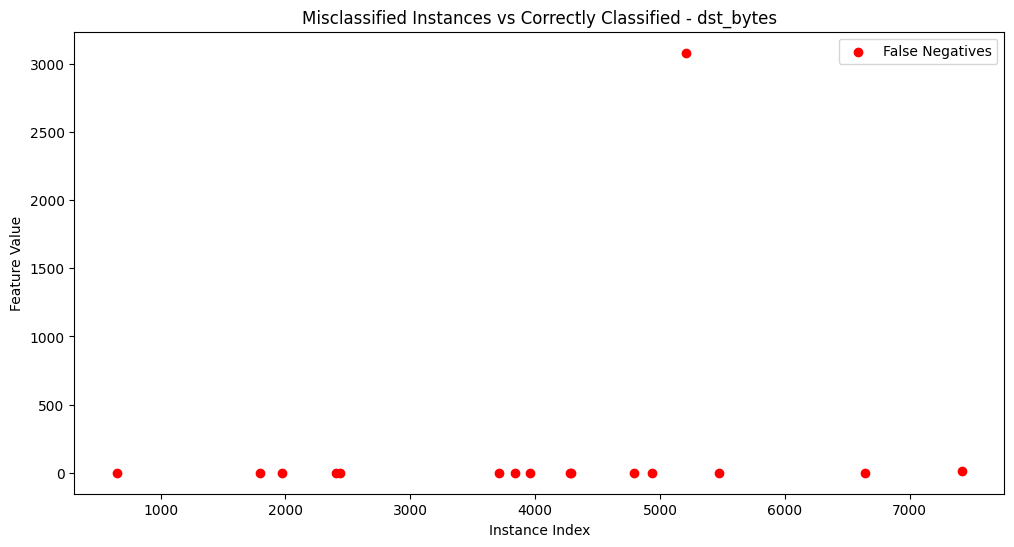

In [34]:
import matplotlib.pyplot as plt

# Assuming binary classification (0: Normal, 1: Attack)
normal_instances = x_test[y_test == 0]
attack_instances = x_test[y_test == 1]

feature_name = 'dst_bytes'
plt.figure(figsize=(12, 6))

plt.scatter(false_negative_indices, x_test.iloc[false_negative_indices][feature_name], color='red', label='False Negatives')

plt.xlabel('Instance Index')
plt.ylabel('Feature Value')
plt.title(f'Misclassified Instances vs Correctly Classified - {feature_name}')
plt.legend()
plt.show()


In [35]:
import joblib

# 'classifier' is trained model
joblib.dump(classifier_top20, 'trained_model.joblib')


['trained_model.joblib']

In [44]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import joblib

class MLApplication:
    def __init__(self, master):
        self.master = master
        self.master.title("NTA Using Machine Learning")

        # Loading trained model
        self.loaded_model = joblib.load('trained_model.joblib')

        self.top_20_features = ['src_bytes',
                                'same_srv_rate',
                                'dst_host_srv_count',
                                'logged_in',
                                'dst_bytes',
                                'flag',
                                'diff_srv_rate',
                                'dst_host_same_src_port_rate',
                                'dst_host_same_srv_rate',
                                'count',
                                'dst_host_serror_rate',
                                'service',
                                'protocol_type',
                                'srv_count',
                                'dst_host_srv_diff_host_rate',
                                'srv_serror_rate',
                                'hot',
                                'dst_host_count',
                                'dst_host_rerror_rate',
                                'dst_host_diff_srv_rate']

        # GUI components
        self.label = tk.Label(self.master, text="Upload a CSV file:")
        self.label.pack()

        self.button = tk.Button(self.master, text="Browse", command=self.browse_file)
        self.button.pack()

        self.results_text = tk.Text(self.master, height=10, width=50)
        self.results_text.pack()

        self.results_text.tag_configure('normal_tag', foreground='blue')
        self.results_text.tag_configure('abnormal_tag', foreground='red')

    def browse_file(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            self.process_file(file_path)

    def process_file(self, file_path):
        input_data = pd.read_csv(file_path)

        input_data_top20 = input_data[self.top_20_features]

        predictions = self.loaded_model.predict(input_data_top20)

        for i, prediction in enumerate(predictions):
            result = f'Row {i + 1}:'
            if prediction == 0:
                result += 'Normal'
                tag = 'normal_tag'
            else: 
                 result += 'Abnormal'
                 tag = 'abnormal_tag'
            result += '\n'

            self.results_text.insert(tk.END, result,tag)

def main():
    root = tk.Tk()
    app = MLApplication(root)
    root.mainloop()

if __name__ == "__main__":
    main()
